# 10 minutes to pandas

## Object creation

In [3]:
import pandas as pd
import numpy as np

In [4]:
s = pd.Series([1,3,5, np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range("2013-01-01", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2013-01-01,0.305115,0.514672,-0.414396,-0.051394
2013-01-02,0.419706,0.217923,-0.757748,-0.949438
2013-01-03,-0.296259,0.501387,-0.372069,-0.373503
2013-01-04,-0.544228,1.105408,-0.429750,-0.200137
2013-01-05,1.074317,-1.253928,-1.325984,2.158863
2013-01-06,-1.199020,0.565522,0.629644,0.257256


In [7]:
df_from_dict = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("2020-02-01"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    },
)
display(df_from_dict)
df_from_dict.dtypes

,A,B,C,D,E,F
0,1.0,2020-02-01,1.0,3,test,foo
1,1.0,2020-02-01,1.0,3,train,foo
2,1.0,2020-02-01,1.0,3,test,foo
3,1.0,2020-02-01,1.0,3,train,foo


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

In [8]:
display(df.head(2))
display(df.tail(3))
display(df.index)
display(df.columns)

,A,B,C,D
2013-01-01,0.305115,0.514672,-0.414396,-0.051394
2013-01-02,0.419706,0.217923,-0.757748,-0.949438


,A,B,C,D
2013-01-04,-0.544228,1.105408,-0.429750,-0.200137
2013-01-05,1.074317,-1.253928,-1.325984,2.158863
2013-01-06,-1.199020,0.565522,0.629644,0.257256


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

Index(['A', 'B', 'C', 'D'], dtype='object')

In [9]:
# Can be expensive if dataframe's columns are of different types.
# It also skips the index.
df.to_numpy()

array([[ 0.30511486,  0.51467194, -0.4143962 , -0.05139416],
       [ 0.41970601,  0.21792302, -0.7577475 , -0.94943836],
       [-0.29625945,  0.5013867 , -0.37206921, -0.37350281],
       [-0.54422835,  1.10540805, -0.4297503 , -0.20013725],
       [ 1.07431663, -1.25392795, -1.32598446,  2.15886308],
       [-1.19902016,  0.56552196,  0.62964448,  0.25725615]])

In [10]:
# Quick stats
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.040062,0.275164,-0.445051,0.140274
std,0.804410,0.802939,0.638012,1.067000
min,-1.199020,-1.253928,-1.325984,-0.949438
25%,-0.482236,0.288789,-0.675748,-0.330161
50%,0.004428,0.508029,-0.422073,-0.125766
75%,0.391058,0.552809,-0.382651,0.180094
max,1.074317,1.105408,0.629644,2.158863


In [11]:
# Transposition
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.305115,0.419706,-0.296259,-0.544228,1.074317,-1.199020
B,0.514672,0.217923,0.501387,1.105408,-1.253928,0.565522
C,-0.414396,-0.757748,-0.372069,-0.429750,-1.325984,0.629644
D,-0.051394,-0.949438,-0.373503,-0.200137,2.158863,0.257256


In [12]:
# Sorting by columns.
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.051394,-0.414396,0.514672,0.305115
2013-01-02,-0.949438,-0.757748,0.217923,0.419706
2013-01-03,-0.373503,-0.372069,0.501387,-0.296259
2013-01-04,-0.200137,-0.429750,1.105408,-0.544228
2013-01-05,2.158863,-1.325984,-1.253928,1.074317
2013-01-06,0.257256,0.629644,0.565522,-1.199020


In [13]:
# Sorting by values.
df.sort_values(by="B")

,A,B,C,D
2013-01-05,1.074317,-1.253928,-1.325984,2.158863
2013-01-02,0.419706,0.217923,-0.757748,-0.949438
2013-01-03,-0.296259,0.501387,-0.372069,-0.373503
2013-01-01,0.305115,0.514672,-0.414396,-0.051394
2013-01-06,-1.199020,0.565522,0.629644,0.257256
2013-01-04,-0.544228,1.105408,-0.429750,-0.200137


## Selection

In [14]:
# Get series (by column name)
df["A"]  # or df.A

2013-01-01    0.305115
2013-01-02    0.419706
2013-01-03   -0.296259
2013-01-04   -0.544228
2013-01-05    1.074317
2013-01-06   -1.199020
Freq: D, Name: A, dtype: float64

In [15]:
# Slice rows
df[:2]

,A,B,C,D
2013-01-01,0.305115,0.514672,-0.414396,-0.051394
2013-01-02,0.419706,0.217923,-0.757748,-0.949438


In [16]:
# Get a cross section (a series).
df.loc[dates[1]]

A    0.419706
B    0.217923
C   -0.757748
D   -0.949438
Name: 2013-01-02 00:00:00, dtype: float64

In [17]:
display(df.loc["2013-01-01":"2013-01-03", ["A", "B"]])


,A,B
2013-01-01,0.305115,0.514672
2013-01-02,0.419706,0.217923
2013-01-03,-0.296259,0.501387


In [18]:
# Get a single scalar value. Two methods.
df.loc["2013-01-01", "A"] == df.at["2013-01-01", "A"]

True

### Selection by position - iloc

In [19]:
df.iloc[3]

A   -0.544228
B    1.105408
C   -0.429750
D   -0.200137
Name: 2013-01-04 00:00:00, dtype: float64

In [20]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.544228,1.105408
2013-01-05,1.074317,-1.253928


In [21]:
df.iloc[[1,2,4], [0,3]]

,A,D
2013-01-02,0.419706,-0.949438
2013-01-03,-0.296259,-0.373503
2013-01-05,1.074317,2.158863


In [22]:
df.iloc[:, 3]

2013-01-01   -0.051394
2013-01-02   -0.949438
2013-01-03   -0.373503
2013-01-04   -0.200137
2013-01-05    2.158863
2013-01-06    0.257256
Freq: D, Name: D, dtype: float64

In [23]:
# Selecting a single scalar value by position. Two methods.
df.iat[1, 1] == df.iloc[1, 1]

True

## Boolean indexing

In [24]:
# Using values from a single column to filter rows.
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.305115,0.514672,-0.414396,-0.051394
2013-01-02,0.419706,0.217923,-0.757748,-0.949438
2013-01-05,1.074317,-1.253928,-1.325984,2.158863


In [25]:
# Select values across the entire df.
df[df > 0]

,A,B,C,D
2013-01-01,0.305115,0.514672,NaN,NaN
2013-01-02,0.419706,0.217923,NaN,NaN
2013-01-03,NaN,0.501387,NaN,NaN
2013-01-04,NaN,1.105408,NaN,NaN
2013-01-05,1.074317,NaN,NaN,2.158863
2013-01-06,NaN,0.565522,0.629644,0.257256


In [26]:
# Filtering using `isin` method.
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.296259,0.501387,-0.372069,-0.373503,two
2013-01-05,1.074317,-1.253928,-1.325984,2.158863,four


### Setting

In [27]:
s1 = pd.Series(list(range(1,7)), index=pd.date_range("2013-01-02", periods=6))
df["F"] = s1
df["F"]

2013-01-01    NaN
2013-01-02    1.0
2013-01-03    2.0
2013-01-04    3.0
2013-01-05    4.0
2013-01-06    5.0
Freq: D, Name: F, dtype: float64

In [28]:
# Set value by label.
df.at[dates[0], "A"] = 0
# And by position.
df.iat[0, 1] = 0

In [29]:
# Setting by assigning a numpy array.
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.414396,5,NaN
2013-01-02,0.419706,0.217923,-0.757748,5,1.0
2013-01-03,-0.296259,0.501387,-0.372069,5,2.0
2013-01-04,-0.544228,1.105408,-0.429750,5,3.0
2013-01-05,1.074317,-1.253928,-1.325984,5,4.0
2013-01-06,-1.199020,0.565522,0.629644,5,5.0


In [30]:
# Using `where` method to set only certain values.
df3 = df.copy()
df3[df3 > 0] = -df3
df3

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.414396,-5,NaN
2013-01-02,-0.419706,-0.217923,-0.757748,-5,-1.0
2013-01-03,-0.296259,-0.501387,-0.372069,-5,-2.0
2013-01-04,-0.544228,-1.105408,-0.429750,-5,-3.0
2013-01-05,-1.074317,-1.253928,-1.325984,-5,-4.0
2013-01-06,-1.199020,-0.565522,-0.629644,-5,-5.0


## Missing data

In [31]:
df1 = df.reindex(index=dates[0:4], columns=(df.columns.to_list() + ["E"]))
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.414396,5,NaN,NaN
2013-01-02,0.419706,0.217923,-0.757748,5,1.0,NaN
2013-01-03,-0.296259,0.501387,-0.372069,5,2.0,NaN
2013-01-04,-0.544228,1.105408,-0.429750,5,3.0,NaN


In [32]:
# Drop missing data.
df1.loc[dates[:2], "E"] = 1
display(df1)
display(df1.dropna(how='any'))

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.414396,5,NaN,1.0
2013-01-02,0.419706,0.217923,-0.757748,5,1.0,1.0
2013-01-03,-0.296259,0.501387,-0.372069,5,2.0,NaN
2013-01-04,-0.544228,1.105408,-0.429750,5,3.0,NaN


,A,B,C,D,F,E
2013-01-02,0.419706,0.217923,-0.757748,5,1.0,1.0


In [33]:
# Fill missing data.
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.414396,5,5.0,1.0
2013-01-02,0.419706,0.217923,-0.757748,5,1.0,1.0
2013-01-03,-0.296259,0.501387,-0.372069,5,2.0,5.0
2013-01-04,-0.544228,1.105408,-0.429750,5,3.0,5.0


## Operations

In [34]:
# Stats on entire DF.
display(df.mean())
# Stats on another axis.
display(df.mean(axis=1))

A   -0.090914
B    0.189385
C   -0.445051
D    5.000000
F    3.000000
dtype: float64

2013-01-01    1.146401
2013-01-02    1.175976
2013-01-03    1.366612
2013-01-04    1.626286
2013-01-05    1.498881
2013-01-06    1.999229
Freq: D, dtype: float64

In [35]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
display(s)
# Broadcast the operation over the specified axis.
df.sub(s, axis='index')

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.296259,-0.498613,-1.372069,4.0,1.0
2013-01-04,-3.544228,-1.894592,-3.429750,2.0,0.0
2013-01-05,-3.925683,-6.253928,-6.325984,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [36]:
# Applying functions.
display(df.apply(np.cumsum))
# `x` will be an entire series.
display(df.apply(lambda x: x.max() - x.min()))

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.414396,5,NaN
2013-01-02,0.419706,0.217923,-1.172144,10,1.0
2013-01-03,0.123447,0.719310,-1.544213,15,3.0
2013-01-04,-0.420782,1.824718,-1.973963,20,6.0
2013-01-05,0.653535,0.570790,-3.299948,25,10.0
2013-01-06,-0.545485,1.136312,-2.670303,30,15.0


A    2.273337
B    2.359336
C    1.955629
D    0.000000
F    4.000000
dtype: float64

In [37]:
# Histogramming.
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

3    3
1    2
5    2
0    1
4    1
6    1
dtype: int64

## String operations.

In [38]:
df = pd.DataFrame(np.random.randn(10, 4))
# Break it into pieces.
parts = [df[:3], df[3:7], df[7:]]
pd.concat(parts).equals(df)

True

In [39]:
# SQL-style merging.
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping

In [40]:
df = pd.DataFrame(
   {
       "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
       "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
       "C": np.random.randn(8),
       "D": np.random.randn(8),
   }
)
df

,A,B,C,D
0,foo,one,-2.728980,1.032619
1,bar,one,0.922517,-1.280616
2,foo,two,1.510180,-1.458203
3,bar,three,1.778901,0.020654
4,foo,two,-0.597597,1.019825
5,bar,two,0.124880,1.304291
6,foo,one,0.616295,1.063744
7,foo,three,-0.288373,1.422963


In [41]:
# SQL-style grouping.
display(df.groupby("A").sum())
display(df.groupby(["A", "B"]).sum())

,C,D
A,,
bar,2.826299,0.044330
foo,-1.488474,3.080947


C         D
A   B                        
bar one    0.922517 -1.280616
    three  1.778901  0.020654
    two    0.124880  1.304291
foo one   -2.112685  2.096362
    three -0.288373  1.422963
    two    0.912583 -0.438378

## Reshaping

In [47]:
pairs = list(zip(["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"], ["one", "two", "one", "two", "one", "two", "one", "two"]))
index = pd.MultiIndex.from_tuples(pairs, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
display(df)
df2 = df[:4]
display(df2)

A         B
first second                    
bar   one    -0.925041 -0.916813
      two     1.086500 -0.492557
baz   one     1.674912 -1.796109
      two    -0.746735 -2.229146
foo   one     1.417272  1.210723
      two    -1.070085  0.855508
qux   one     0.281814 -1.474978
      two    -0.411902  0.260217

A         B
first second                    
bar   one    -0.925041 -0.916813
      two     1.086500 -0.492557
baz   one     1.674912 -1.796109
      two    -0.746735 -2.229146

In [50]:
# Stack - compress a level in a DF's columns.
stacked = df2.stack()
display(stacked)
# Do the reverse.
display(stacked.unstack())
display(stacked.unstack(1))
display(stacked.unstack(0))

first  second   
bar    one     A   -0.925041
               B   -0.916813
       two     A    1.086500
               B   -0.492557
baz    one     A    1.674912
               B   -1.796109
       two     A   -0.746735
               B   -2.229146
dtype: float64

A         B
first second                    
bar   one    -0.925041 -0.916813
      two     1.086500 -0.492557
baz   one     1.674912 -1.796109
      two    -0.746735 -2.229146

second        one       two
first                      
bar   A -0.925041  1.086500
      B -0.916813 -0.492557
baz   A  1.674912 -0.746735
      B -1.796109 -2.229146

first          bar       baz
second                      
one    A -0.925041  1.674912
       B -0.916813 -1.796109
two    A  1.086500 -0.746735
       B -0.492557 -2.229146

## Pivot tables

In [55]:
df = pd.DataFrame(
    {
        "c1": ["one", "one", "two", "three"] * 3,
        "c2": ["A", "B", "C"] * 4,
        "c3": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "c4": np.random.randn(12),
        "c5": np.random.randn(12),
    }
)
pd.pivot_table(df, values="c4", index=["c1", "c2"], columns=["c3"])

c3             bar       foo
c1    c2                    
one   A   1.614068  1.217497
      B  -1.599142 -0.921526
      C   0.157239  0.607809
three A   1.566123       NaN
      B        NaN -0.899763
      C   0.432387       NaN
two   A        NaN  0.272545
      B   0.012659       NaN
      C        NaN  1.169011

## Time series

In [61]:
time_range = pd.date_range("1/1/2012", periods=100, freq="S")
time_series = ts = pd.Series(np.random.randint(0, 500, len(time_range)), index=time_range)
display(time_series)
ts.resample("5Min").sum()

2012-01-01 00:00:00    278
2012-01-01 00:00:01    147
2012-01-01 00:00:02    485
2012-01-01 00:00:03    266
2012-01-01 00:00:04    452
                      ... 
2012-01-01 00:01:35    420
2012-01-01 00:01:36    227
2012-01-01 00:01:37    195
2012-01-01 00:01:38    100
2012-01-01 00:01:39    282
Freq: S, Length: 100, dtype: int32

2012-01-01    26223
Freq: 5T, dtype: int32

In [65]:
# With timezone.
time_range = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
time_series = pd.Series(np.random.randn(len(time_range)), time_range)
time_series_utc = time_series.tz_localize("UTC")

display(time_series)
display(time_series_utc)
display(time_series_utc.tz_convert("US/Eastern"))

2012-03-06   -0.096080
2012-03-07   -0.600079
2012-03-08    0.478730
2012-03-09   -0.576053
2012-03-10   -1.329539
Freq: D, dtype: float64

2012-03-06 00:00:00+00:00   -0.096080
2012-03-07 00:00:00+00:00   -0.600079
2012-03-08 00:00:00+00:00    0.478730
2012-03-09 00:00:00+00:00   -0.576053
2012-03-10 00:00:00+00:00   -1.329539
Freq: D, dtype: float64

2012-03-05 19:00:00-05:00   -0.096080
2012-03-06 19:00:00-05:00   -0.600079
2012-03-07 19:00:00-05:00    0.478730
2012-03-08 19:00:00-05:00   -0.576053
2012-03-09 19:00:00-05:00   -1.329539
Freq: D, dtype: float64

In [68]:
# Converting between time span representations.
time_range = pd.date_range("1/1/2012", periods=5, freq="M")
time_series = pd.Series(np.random.randn(len(time_range)), index=time_range)
ps = time_series.to_period()
display(time_series)
display(ps)
display(ps.to_timestamp())

2012-01-31   -0.958475
2012-02-29    0.120175
2012-03-31   -0.414237
2012-04-30    0.602073
2012-05-31   -1.509958
Freq: M, dtype: float64

2012-01   -0.958475
2012-02    0.120175
2012-03   -0.414237
2012-04    0.602073
2012-05   -1.509958
Freq: M, dtype: float64

2012-01-01   -0.958475
2012-02-01    0.120175
2012-03-01   -0.414237
2012-04-01    0.602073
2012-05-01   -1.509958
Freq: MS, dtype: float64

In [72]:
period_range = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
time_series = pd.Series(np.random.randn(len(period_range)), period_range)
time_series.index = (period_range.asfreq("M", "e") + 1).asfreq("H", "s") + 9
display(period_range)
display(time_series.head())

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

1990-03-01 09:00   -0.144365
1990-06-01 09:00    1.427309
1990-09-01 09:00    0.715418
1990-12-01 09:00    1.022450
1991-03-01 09:00   -1.135598
Freq: H, dtype: float64

## Categoricals

In [85]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df["grade"] = df["raw_grade"].astype("category")
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
display(df.sort_values(by="grade", ascending=False))
display(df.groupby("grade").size())

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [88]:
import matplotlib.pyplot as plt
plt.close("all")

<AxesSubplot:>

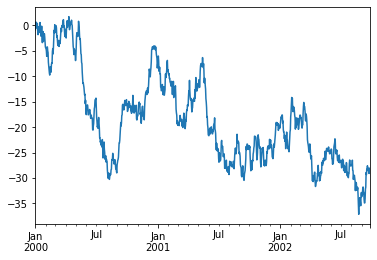

In [90]:
# Plotting a single series.
size = 1000
ts = pd.Series(np.random.randn(size), index=pd.date_range("1/1/2000", periods=size)).cumsum()
ts.plot()

<AxesSubplot:>

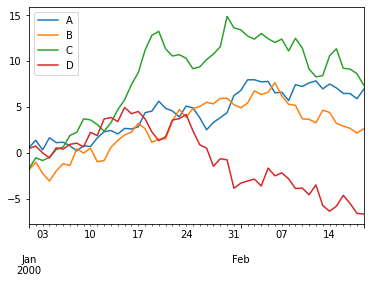

In [100]:
# Plotting an entire dataframe.
size = 50
columns = list("ABCD")
df = pd.DataFrame(
    np.random.randn(size, len(columns)),
    index=pd.date_range("1/1/2000", periods=size),
    columns=columns,
).cumsum()
df.plot()

## Getting data in/out

In [104]:
# Simple CSV I/O.
import os

file_name = "foo.csv"
df.to_csv(file_name)
display(pd.read_csv(file_name).head())
# Clean up.
os.remove(file_name)

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.566513,-1.858686,-1.727280,0.470297
1,2000-01-02,1.354188,-1.035750,-0.549297,0.717960
2,2000-01-03,0.302393,-2.246286,-0.852384,-0.026549
3,2000-01-04,1.629417,-3.089211,-0.500097,-0.574397
4,2000-01-05,1.098393,-1.966468,0.345645,0.532329


In [106]:
# Supports HDF5 format.
# REQUIRES PYPI PACKAGE: tables
import os

file_name = "foo.h5"
df.to_hdf(file_name, "df")
display(pd.read_hdf(file_name, "df"))
# Clean up.
os.remove(file_name)

ImportError: Missing optional dependency 'tables'.  Use pip or conda to install tables.

In [108]:
# Supports MS Excel format.
# REQUIRES PYPI PACKAGE: openpyxl
import os

file_name = "foo.xlsx"
df.to_excel(file_name, sheet_name="pandas demo")
pd.read_excel(file_name, sheet_name="pandas demo", index_col=None, na_values=["NA"])
# Clean up.
os.remove(file_name)

KeyboardInterrupt: 


## Gotchas

In [110]:
series = pd.Series([True, True, False])
# Do not do this:
try:
    if series:
        print("I was truthy!")
except ValueError:
    print("That's not how you evaluate pandas objects!")


That's not how you evaluate pandas objects!


In [113]:
# Do this instead:
if series.all():
    print("I was totally truthy!")
if series.any():
    print("Some part of me is truthy!")

Some part of me is truthy!
